* 用途
    * 数据分析，人工智能数据集
    * 冷启动
    * 舆情监控
* 数据抓取
    * library
        * requests
        * urllib
        * pycurl
    * tools
        * curl
        * wget
        * httpie
* 数据解析
    *
* 数据存储
    *

# 爬虫简介

* 爬虫在使用场景中的分类:
    - 通用爬虫
        抓取系统重要组成部分。抓取的是一整张页面数据
    - 聚焦爬虫
        是建立在通用爬虫的基础上。抓取的是页面中特定的局部内容。比如页面中评论数据。
    - 增量式爬虫
        检测网站中数据更新的情况，只会抓取网站中最新更新出来的数据。最重要环节
* 爬虫的矛与盾
* 反爬机制
    * 门户网站可以通过制定相应策略或技术手段，防止爬虫程序进行网站数据的爬取
* 反反爬策略
* robots.txt协议
    * 君子协议，规定了网站哪些数据可以被爬虫哪些不可以
    * [robots文件检测和翻译](https://www.qtool.net/testrobots)

* http协议
    * 服务器和客户端进行数据交互的一种形式
* 常用请求头信息
    * User-Agent:请求载体的身份标识
    * Connection：请求完毕后，是断开连接还是保持连接
* 常用响应头信息
    * Content-Type：服务器响应回客户端的数据类型
    * 
* https协议（security）
    * 安全的超文本传输协议
    * 如何理解安全和不安全：
        * 安全，数据加密，http没有数据加密
* 加密方式
    * 对称密钥加密
        * 客户端发请求，请求数据，客户端制定加密方式，加密之后的密文以及密钥发给服务器端，服务器端通过密钥解开密文
    * 非对称密钥加密
        * 服务器设置好加密方式，发送给客户端，而客户端利用加密方式加密，然后将密文发给服务端，发送给客户端的称为公钥，自己的成为私钥
    * 证书密钥加密
        * https采用方式，加入证书认证机构，中间机构。服务器端产生公钥，先把公钥给证书认证机构，先审核该公钥，认证成功给与该公钥数字签名，用于防伪，然后再将已经有数字签名的公钥加入证书中，发给客户端。

# 使用requests模块发起请求，获得回应

* requests模块

    python中原生的一款基于网络请求的模块，功能强大，便捷，效率极高
    
    作用：模拟浏览器发请求。
    
    * 如何使用：
        * 指定url
        * 发起请求（既能get，也能post，浏览器只能get）
        * 获取响应数据
        * 持久化存储

## 搜狗页面爬取

In [3]:
#实战编码
import requests
if __name__=='__main__':
    #指定url
    url='https://www.sogou.com/'
    #发起请求
    response=requests.get(url=url)
    #获取响应数据
    page_text=response.text
    print(page_text)
    # 持久化存储
    with open('./sogou.html','w',encoding='utf-8') as fp:
        fp.write(page_text)
    print('爬取数据结束')

D:\Anaconda\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (4.0.0) doesn't match a supported version!
  RequestsDependencyWarning)


<!DOCTYPE html><html lang="cn"><head><meta name="viewport" content="width=device-width,minimum-scale=1,maximum-scale=1,user-scalable=no"><script>window._speedMark = new Date();  window.lead_ip = '183.95.248.70';
    window.now = 1626232064333;</script><script type="text/javascript">/*file=static/js/resourceErrorReport.js*/!function(a){var n=(new Date).getTime(),r=a.location.protocol;function c(e,t){var o=(new Date).getTime()-n;(new Image).src=["//pb.sogou.com/pv.gif?uigs_productid=wapapp&type=resource-error&stype=",e,"&timestamp=",o,"&protocol=",r,"&host=",encodeURIComponent(a.location.host),"&path=",encodeURIComponent(a.location.pathname),"&resource=",encodeURIComponent(t)].join("")}function e(e){if((e=e||a.event)&&"error"===e.type){var t=e.srcElement?e.srcElement:e.target;if(t){var o,n,r=t.tagName;"LINK"===r?(n="css",(o=t.getAttribute("href"))&&o.match(/\.css($|\?)/)&&c(n,o)):"SCRIPT"===r&&(n="js",(o=t.getAttribute("src"))&&o.match(/\.js($|\?)/)&&c(n,o))}}}r&&(r=r.substring(0,r.lengt

In [4]:
# 搜狗搜索，采集网页，设置简易的网页采集器
if __name__=="__main__":
    #url='https://www.sogou.com/web?query=波晓张'
    url='https://www.sogou.com/web'
    kw=input('enter a word:')
    param={
        'query':kw
    }
    #对指定的url发起的请求对应的url是携带参数的，并且请求过程中处理了参数
    response=requests.get(url=url,params=param)
    page_text=response.text
    fileName=kw+'.html'
    with open(fileName,'w',encoding='utf-8') as fp:
        fp.write(page_text)
    print(fileName,'保存成功')

enter a word:波晓张
波晓张.html 保存成功


* 反爬机制 UA检测
    门户网站的服务器会检测对应请求的载体身份标识，如果检测到请求的载体身份标识为某一款浏览器，则该请求为正常的请求。但是，如果不是，就是爬虫，则很可能会拒绝。

* 身份标识
    User-Agent
    
* 反反爬
    * UA伪装：让爬虫对应的请求载体身份标识符伪装成某一款浏览器
    

In [5]:
# 搜狗搜索，采集网页，设置简易的网页采集器
if __name__=="__main__":
    #url='https://www.sogou.com/web?query=波晓张'
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}
    url='https://www.sogou.com/web'
    kw=input('enter a word:')
    param={
        'query':kw
    }
    #对指定的url发起的请求对应的url是携带参数的，并且请求过程中处理了参数
    response=requests.get(url=url,params=param,headers=headers)
    page_text=response.text
    fileName=kw+'1.html'
    with open(fileName,'w',encoding='utf-8') as fp:
        fp.write(page_text)
    print(fileName,'保存成功')

enter a word:波晓张
波晓张1.html 保存成功


## 破解百度翻译

In [7]:
# 破解百度翻译
# 页面局部刷新
# ajax请求发送，请求成功后，将局部内容刷新
# 输入dog，产生三个sug，第一个sug post 参数kw为d，第二个post 参数kw为do，第三个post 参数kw为dog
# 响应数据，是json字符串，
# 解决：post请求（携带了参数）

XHR所对应请求
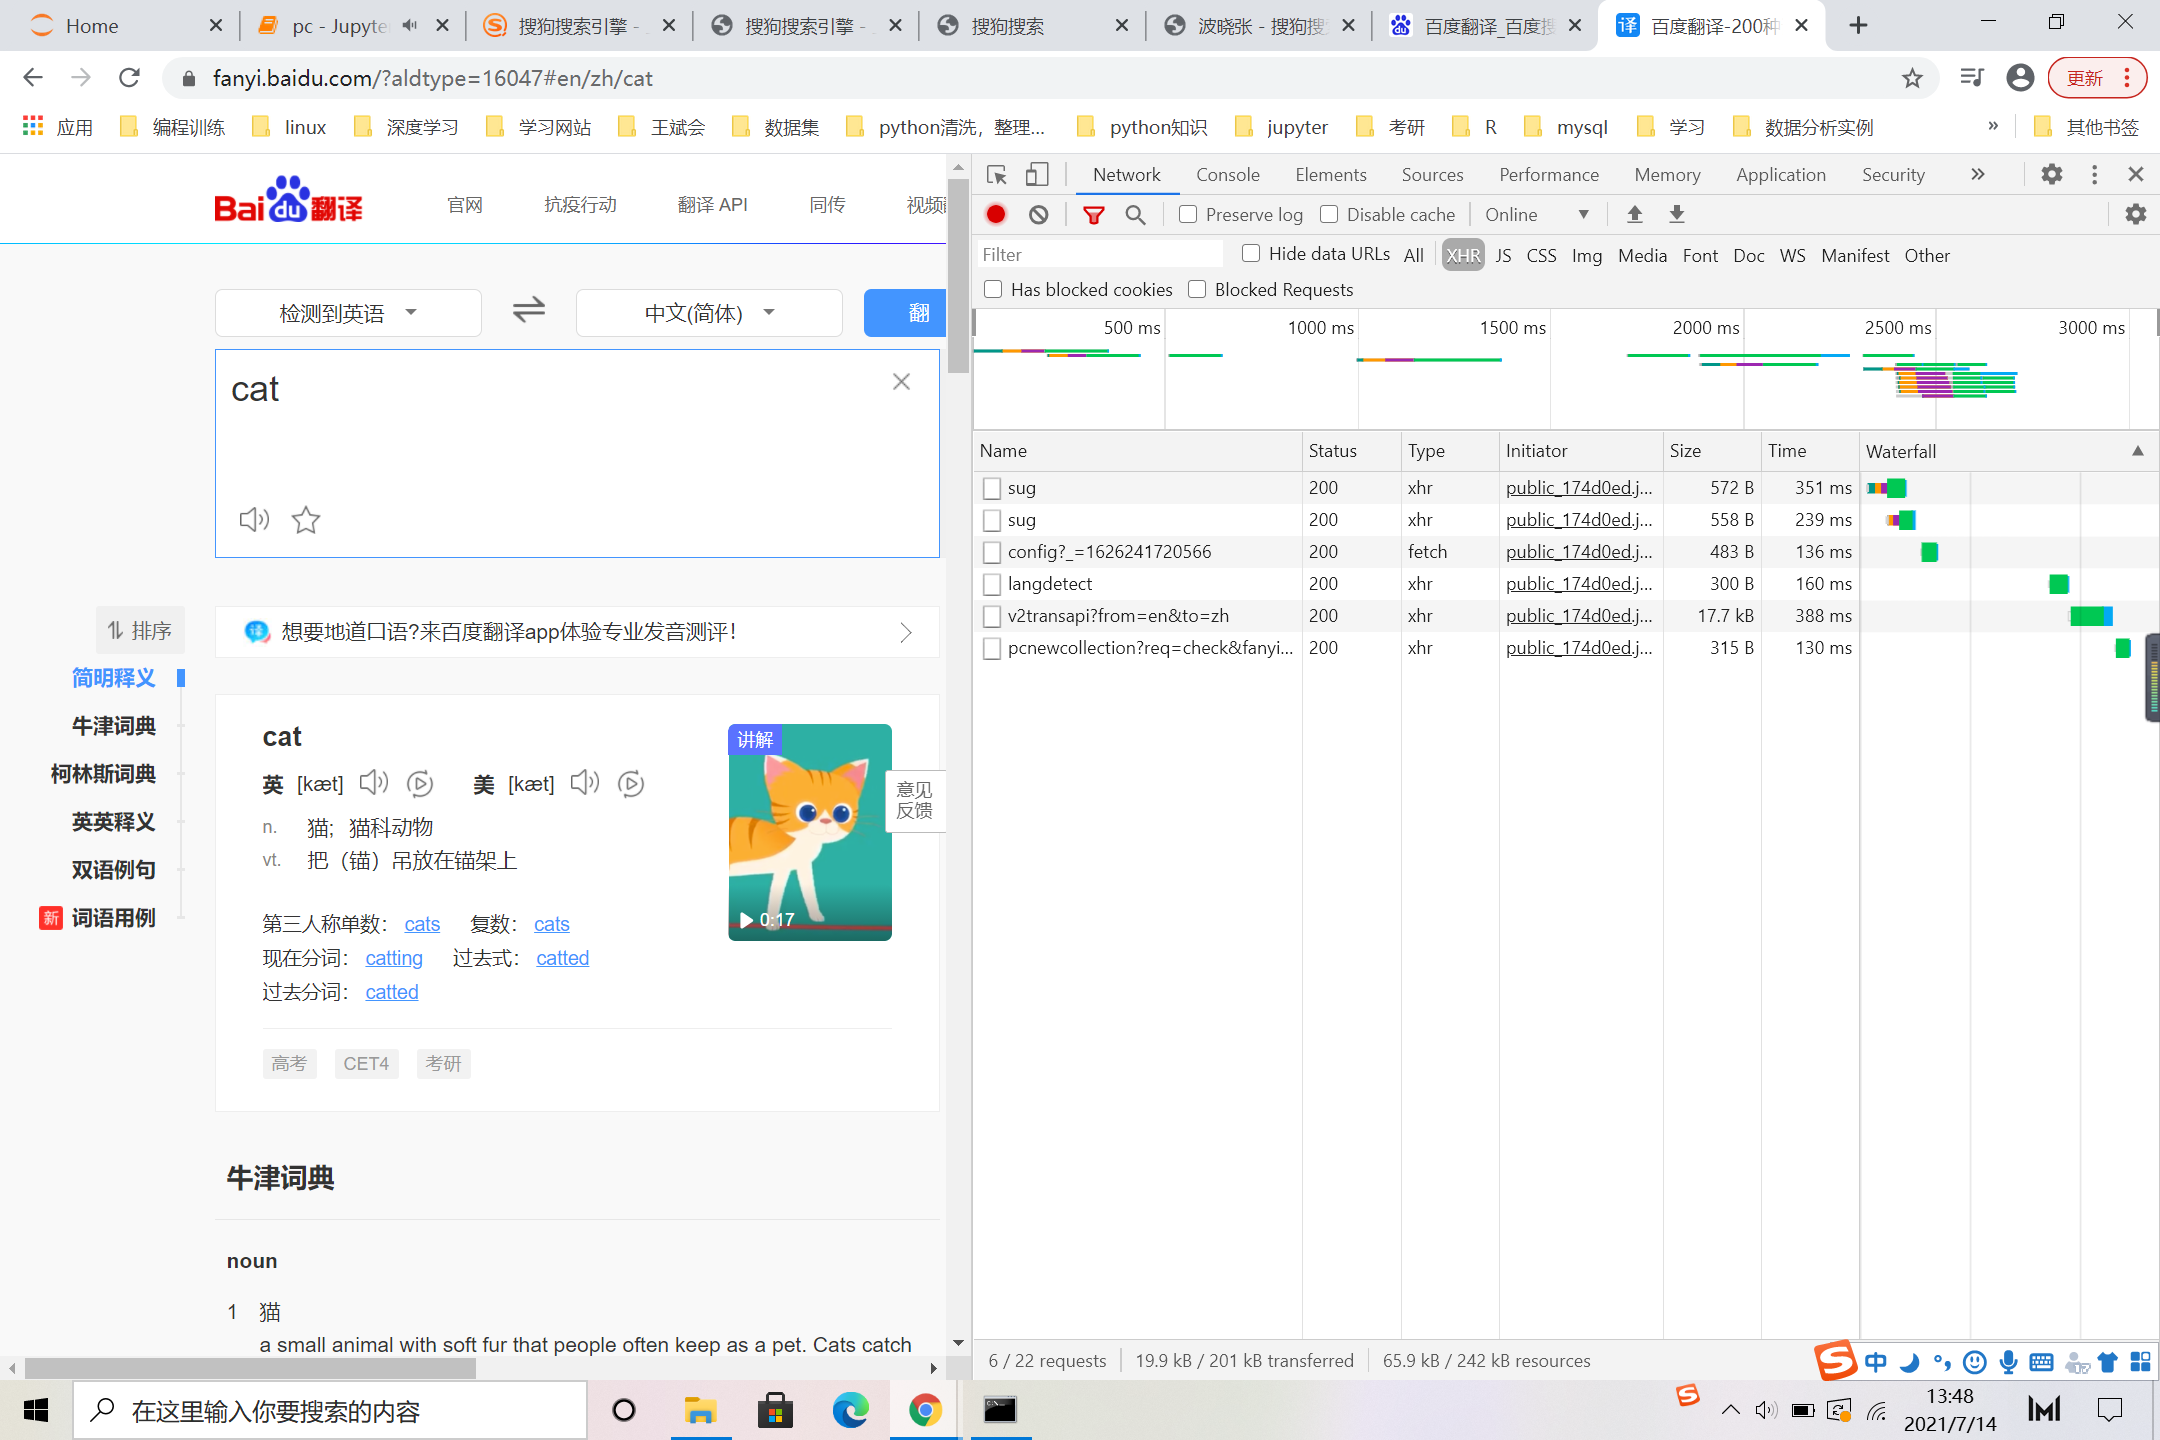

In [10]:
import requests
import json
if __name__=='__main__':
    post_url='https://fanyi.baidu.com/sug'
    #UA伪装
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}
    #post请求参数处理(同get请求一致)
    word=input('enter a word:')
    data={'kw':word}
    #data={'kw':'dog'}
    #请求发送,
    response=requests.post(url=post_url,data=data,headers=headers)#这里是data
    #获取响应数据：因为这里返回的是json格式，所以利用.json方法，可以通过request headers查看contents-type
    dic_obj=response.json()
    #存储
    fileName=word+'.json'
    #fp=open('./dog.json','w',encoding='utf-8')#
    fp=open(fileName,'w',encoding='utf-8')
    json.dump(dic_obj,fp=fp,ensure_ascii=False)#因为有中文
    print('over')

enter a word:dog
over


## 豆瓣电影信息爬取

* 拖动滚轮，数据在滑动，会发生请求，局部更新
    * 打开XHR，滑动滚轮，会发生更新，get请求，查看url，以及参数，拿到的是json数据

In [21]:
# 爬取豆瓣电影分类排行榜
import requests
import json
if __name__ == '__main__':
    #把url后面的参数都封装到字典里
    #url="https://movie.douban.com/j/chart/top_list?type=24&interval_id=100%3A90&action=&start=20&limit=20"
    url="https://movie.douban.com/j/chart/top_list"
    param={
        'type':'24',
        'interval_id':'100:90',
        'action':'',
        'start':'1',#从库中的第几部电影去取,index从0开始
        'limit':'20'#一次取出的个数
    }
    #这里也可以动态设置输入start和limit
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}
    response=requests.get(url=url,params=param,headers=headers)
    print(response.status_code)
    list_data=response.json()
    fp=open('./douban.json','w',encoding='utf-8')
    json.dump(list_data,fp=fp,ensure_ascii=False)
    fp.close()

200


* 怎样判断是不是ajax
    * 输入后点击或者回车，局部页面刷新，网址不变

## 肯德基各地餐厅信息爬取

In [30]:
# 爬取肯德基餐厅查询app
#http://www.kfc.com.cn/kfccda/index.aspx
import requests
import json
if __name__ == '__main__':
    keyword=input('地点:')
    post_url='http://www.kfc.com.cn/kfccda/ashx/GetStoreList.ashx'
    data={
        'op':'keyword',#注意吧？号后面的也写成参数，总共是url中的参数加上formdata的参数
        'cname':'',
        'pid':'',
        'Keyword':keyword,
        'pageIndex':'1',
        'pageSize':'10'
    }
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}
    response=requests.post(url=post_url,data=data,headers=headers)
    page_text=response.text
    with open(keyword+'.txt','w',encoding='utf-8') as fp:
        fp.write(page_text)
    print('over')

地点:北京
over


## 国家药监总局，化妆品信息爬取

In [32]:
# 国家药监总局
# http://scxk.nmpa.gov.cn:81/xk/
# 爬取国家药品监督管理总局中基于中华人民共和国化妆品生产许可证相关数据

if __name__ == '__main__':
    url='http://scxk.nmpa.gov.cn:81/xk/'
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}
    response=requests.get(url,headers=headers)
    page_text=response.text
    with open('./huazhuangpin.html','w',encoding='utf-8') as fp:
        fp.write(page_text)
    print('over')

over


出现异常

在该url下并没有请、求到化妆品公司信息，说明很可能是单独其他的ajax请求得到的

称为动态加载

In [42]:
if __name__ == '__main__':
    url_post='http://scxk.nmpa.gov.cn:81/xk/itownet/portalAction.do'
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}
    data={
        'method':'getXkzsList',
        'on': 'true',
        'page': '1',
        'pageSize': '15',
        'productName':'' ,
        'conditionType': '1',
        'applyname':'' 
    }
    response=requests.post(url=url_post,data=data,headers=headers)
    dic_obj=response.json()
    all_data_list=[]#存取所有企业详情数据字典
    for i in dic_obj['list']:
        url_href='http://scxk.nmpa.gov.cn:81/xk/itownet/portalAction.do'
        data_href={'id':i['ID'],'method':'getXkzsById'}
        response_href=requests.post(url=url_href,data=data_href,headers=headers)
        dic_obj_href=response_href.json()
        all_data_list.append(dic_obj_href)
        #print(dic_obj_href)
    fp=open('./huazhuangpin.json','w',encoding='utf-8')
    json.dump(all_data_list,fp=fp,ensure_ascii=False)
    fp.close()

In [45]:
import pandas as pd
company=pd.DataFrame(all_data_list)

In [46]:
company.iloc[0]

businessLicenseNumber                        91330127MA2J2KJF7F
businessPerson                                              孙喜洋
certStr                             膏霜乳液单元；一般液态单元（具体产品类别见副本）***
cityCode                                                       
countyCode                                                     
creatUser                                                      
createTime                                                     
endTime                                                        
epsAddress               浙江省杭州市淳安县浙江省杭州市淳安县千岛湖镇涌金路199号3号车间2楼、3楼
epsName                                          修熙（杭州）生物科技有限公司
epsProductAddress               浙江省杭州市淳安县千岛湖镇涌金路199号3号车间2、3楼***
id                                                             
isimport                                                      Y
legalPerson                                                 孙喜洋
offDate                                                        
offReason                               

获取所有page可以写一个page循环

# 数据解析

* 分类
    * 正则
    * bs4
    * xpath（通用性更高，重点）
* 数据解释原理概述
    * 数据的局部的文本内容都会在标签之间或者标签对应的属性中进行存储
        * 进行制定标签的定位
        * 标签或者标签对应的属性中存储的数据值进行提取
* 聚焦爬虫：爬取页面中指定的页面内容。
    * 多了一步解析内容

## 爬取图片内容

In [48]:
#糗图百科
if __name__ == '__main__':
    url='https://pic.qiushibaike.com/system/pictures/12452/124526225/medium/A2UV83AJ1AZKK59P.jpg'
    img_data=requests.get(url=url).content
    #content返回二进制形式的图片数据
    #text(字符串)
    #json()(对象)
    with open('./qiutu.jpg','wb') as fp:
        fp.write(img_data)
#

In [6]:
from IPython.display import IFrame
IFrame("https://www.bilibili.com/video/BV1Yh411o7Sz?share_source=copy_web", width="1000",height="500")

In [ ]:
import requests
import re
#爬取糗事百科中热图板块下的所有图片
